# Big Data Techniques in Physics - Third Exercise
# Student: Jefferson Alexander Romero Márquez
# Date: 10/11/2024

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

#####  Read the tabulated file with the Pandas library (beware, it is a text file and not a csv file) and create a histogram of the values contained in the z column —whose meaning is redshift, i.e. something like the distance at which the galaxy is from us—. Write down labels for the x and y axis, and give also a title to the plot. 

In [2]:
# Loading the data
df = pd.read_csv('archivo_tabulado.cat', sep='\s+')
df.head()

,gal,field,ra,dec,mass,z,f,mag,dmag,re,...,zspec_legac_dr3,zspec_hathi,z_damjanov,z_damjanov_quality,hudf_for_B,hudf_for_V,hudf_for_I,hudf_for_Y,hudf_for_J,hudf_for_H
0,26,cosmos,150.060572,2.175582,1.872837e+10,0.817,0,21.1887,0.008493,0.155652,...,-99.0,-99.000,-99.0,-99.0,0,0,0,0,0,0
1,130,cosmos,150.064230,2.178647,1.341220e+10,0.970,0,22.0935,0.016323,0.631092,...,-99.0,-99.000,-99.0,-99.0,0,0,0,0,0,0
2,270,cosmos,150.082488,2.182182,2.171701e+10,0.810,0,21.0736,0.009481,0.652236,...,-99.0,0.680,-99.0,-99.0,0,0,0,0,0,0
3,283,cosmos,150.072359,2.183000,1.364583e+10,0.960,0,22.0019,0.012504,0.466860,...,-99.0,0.987,-99.0,-99.0,0,0,0,0,0,0
4,453,cosmos,150.125403,2.185425,1.248245e+11,2.020,0,21.5030,0.010735,0.197274,...,-99.0,-99.000,-99.0,-99.0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3460 entries, 0 to 3459
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gal                 3460 non-null   int64  
 1   field               3460 non-null   object 
 2   ra                  3460 non-null   float64
 3   dec                 3460 non-null   float64
 4   mass                3460 non-null   float64
 5   z                   3460 non-null   float64
 6   f                   3460 non-null   int64  
 7   mag                 3460 non-null   float64
 8   dmag                3460 non-null   float64
 9   re                  3460 non-null   float64
 10  dre                 3460 non-null   float64
 11  n                   3460 non-null   float64
 12  dn                  3460 non-null   float64
 13  q                   3460 non-null   float64
 14  dq                  3460 non-null   float64
 15  pa                  3460 non-null   float64
 16  dpa   

In [4]:
# Creating a variable to store the data for the readshift (z column)
z=df['z']
z.head()

0    0.817
1    0.970
2    0.810
3    0.960
4    2.020
Name: z, dtype: float64

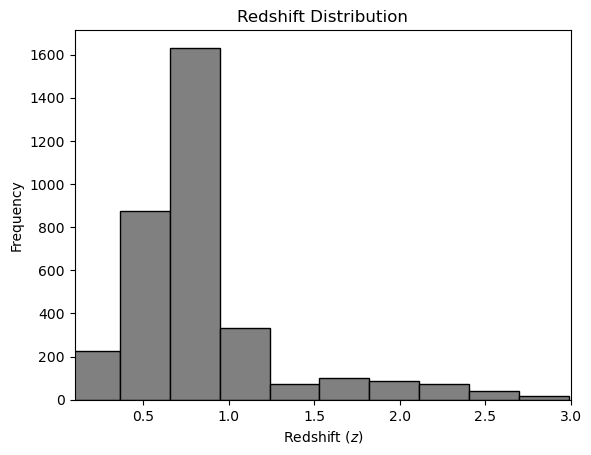

In [5]:
# Creating the histogram
plt.hist(z, color='gray',edgecolor='black')
plt.xlim(left=0.1,right=3)
plt.title('Redshift Distribution')
plt.xlabel(r'Redshift $(z)$')
plt.ylabel('Frequency')
plt.show()

##### Create a scatter plot for the galaxy mass (x axis) and the effective radii (re column, being it the y axis). Show only masses greater than 3x10^9 M_Sun and positive effective radii. Use different data points for objects with lower or greater Sersic indices (column n) values than 2.5. There must also appear two vertical lines, one at 5x10^10 M_Sun and another at 10^11 M_Sun. The x axis must be displayed logarithmically.

In [6]:
# Creating variables to store the data to make the scatterplot
mass=df['mass']
re=df['re']
n=df['n']
print(mass.head(),re.head(),n.head())

0    1.872837e+10
1    1.341220e+10
2    2.171701e+10
3    1.364583e+10
4    1.248245e+11
Name: mass, dtype: float64 0    0.155652
1    0.631092
2    0.652236
3    0.466860
4    0.197274
Name: re, dtype: float64 0    2.5111
1    0.8698
2    1.2749
3    0.8058
4    2.5022
Name: n, dtype: float64


In [7]:
# Creating a variable to store the filtered data we will be using
scatter_data = df[(mass > 3e9) & (re > 0)]

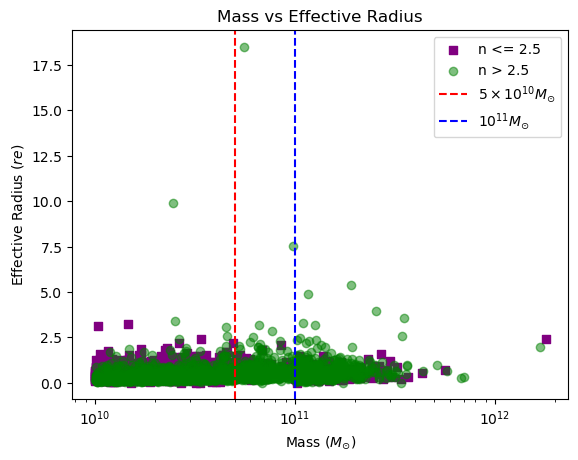

In [8]:
# Creating the scatterplot when n>2.5
plt.scatter(scatter_data['mass'][scatter_data['n'] <= 2.5], 
            scatter_data['re'][scatter_data['n'] <= 2.5], 
            color='purple', label='n <= 2.5',marker='s')

# Creating the scatterplot when n>2.5
plt.scatter(scatter_data['mass'][scatter_data['n'] > 2.5], 
            scatter_data['re'][scatter_data['n'] > 2.5], 
            color='green', label='n > 2.5',alpha=0.5)

# Creating the vertical lines
plt.axvline(5e10, color='red', linestyle='dashed', label='$5 \\times 10^{10} M_{\\odot}$')
plt.axvline(1e11, color='blue', linestyle='dashed', label='$10^{11} M_{\\odot}$')

# Perzonalization of the scatterplot
plt.xscale('log')
plt.xlabel('Mass ($M_{\\odot}$)')
plt.ylabel(r'Effective Radius $(re)$')
plt.title('Mass vs Effective Radius')
plt.legend()
plt.show()

#####  Given the 17058_goodss_* tabulated files, you must create four plots that must containing the galaxy surface brightness luminosity profile in each band. There, the x axis must be the distance in pixels and the y axis the sb column, but setting the smaller numbers in the top part of the axis —see the example below—. Add error bars in the y axis (sb_error column). You must also create another plot containing the lines in the four previous plots and with a legend displaying the name of each filter.

In [9]:
# Opening the files
dfH=pd.read_csv('17058_goodss_H.cat',sep=('\s+'))
dfI=pd.read_csv('17058_goodss_I.cat',sep=('\s+'))
dfJ=pd.read_csv('17058_goodss_J.cat',sep=('\s+'))
dfV=pd.read_csv('17058_goodss_V.cat',sep=('\s+'))

In [10]:
# Info of the Dataframes
print(dfH.info())
print(dfI.info())
print(dfJ.info())
print(dfV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vector_dist_arcsec  99 non-null     float64
 1   vector_dist_kpc     99 non-null     float64
 2   sb                  54 non-null     float64
 3   sb_error            54 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vector_dist_arcsec  99 non-null     float64
 1   vector_dist_kpc     99 non-null     float64
 2   sb                  81 non-null     float64
 3   sb_error            81 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column     

In [11]:
# Dropping NaN values in the DataFrames
dfH.dropna(inplace=True)
dfI.dropna(inplace=True)
dfJ.dropna(inplace=True)
dfV.dropna(inplace=True)

In [12]:
# Info of the DataFrames after dropping NaN values
print(dfH.info())
print(dfI.info())
print(dfJ.info())
print(dfV.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 67
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vector_dist_arcsec  54 non-null     float64
 1   vector_dist_kpc     54 non-null     float64
 2   sb                  54 non-null     float64
 3   sb_error            54 non-null     float64
dtypes: float64(4)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 0 to 98
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vector_dist_arcsec  81 non-null     float64
 1   vector_dist_kpc     81 non-null     float64
 2   sb                  81 non-null     float64
 3   sb_error            81 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0 to 96
Data columns (total 4 columns):
 #   Column              Non-Nu

In [13]:
# Deleting wrong (94, 95 and 96 according to index) data from dfJ
print(dfJ.tail())
dfJ=dfJ.drop([94,95,96])
print(dfJ.tail())

    vector_dist_arcsec  vector_dist_kpc         sb   sb_error
89           13.170898             89.5  30.134798   0.244641
90           13.318059             90.5  31.003250   0.480476
94           13.906702             94.5  31.897490  27.457574
95           14.053863             95.5  31.297234  26.948496
96           14.201024             96.5  30.880564  26.619814
    vector_dist_arcsec  vector_dist_kpc         sb  sb_error
85           12.582254             85.5  31.585662  0.690303
87           12.876576             87.5  31.869812  0.871754
88           13.023737             88.5  30.960032  0.454598
89           13.170898             89.5  30.134798  0.244641
90           13.318059             90.5  31.003250  0.480476


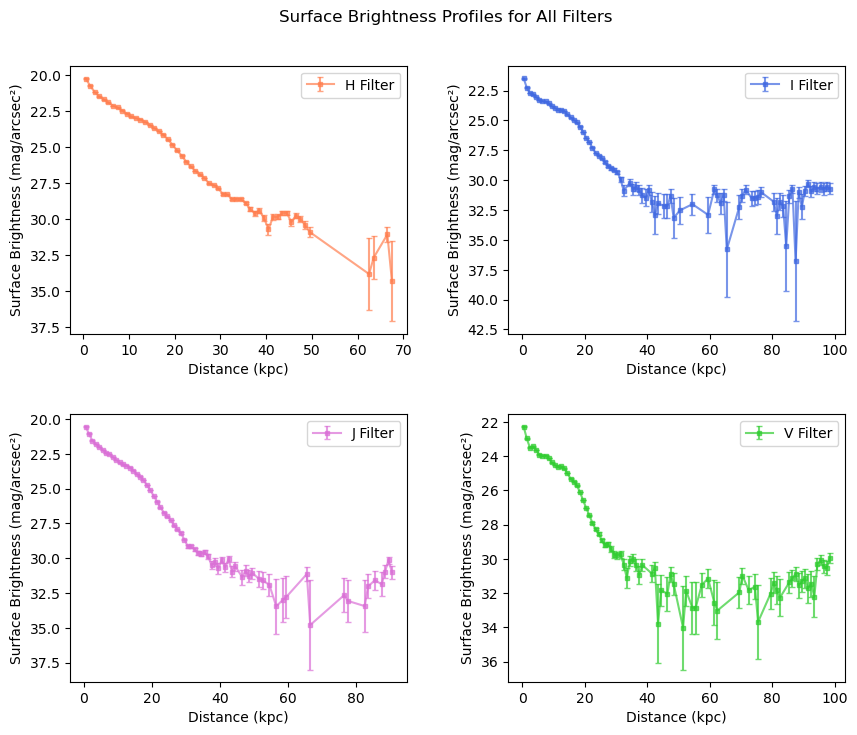

In [14]:
# Creating the arrange 2x2 to store the plots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Creating the plot for H
axs[0, 0].errorbar(dfH['vector_dist_kpc'], dfH['sb'], yerr=dfH['sb_error'], 
                   color='coral', linestyle='-', capsize=2, alpha=0.7, label='H Filter', 
                   marker='s', markersize=3)
axs[0, 0].invert_yaxis()
axs[0, 0].set_xlabel('Distance (kpc)')
axs[0, 0].set_ylabel('Surface Brightness (mag/arcsec²)')
axs[0, 0].legend()

# Creating the plot for I
axs[0, 1].errorbar(dfI['vector_dist_kpc'], dfI['sb'], yerr=dfI['sb_error'], 
                   color='royalblue', linestyle='-', capsize=2, alpha=0.7, label='I Filter',
                   marker='s', markersize=3)
axs[0, 1].invert_yaxis()
axs[0, 1].set_xlabel('Distance (kpc)')
axs[0, 1].set_ylabel('Surface Brightness (mag/arcsec²)')
axs[0, 1].legend()

# Creating the plot for J
axs[1, 0].errorbar(dfJ['vector_dist_kpc'], dfJ['sb'], yerr=dfJ['sb_error'], 
                   color='orchid', linestyle='-', capsize=2, alpha=0.7, label='J Filter',
                   marker='s', markersize=3)
axs[1, 0].invert_yaxis()
axs[1, 0].set_xlabel('Distance (kpc)')
axs[1, 0].set_ylabel('Surface Brightness (mag/arcsec²)')
axs[1, 0].legend()

# Creating the plot for V
axs[1, 1].errorbar(dfV['vector_dist_kpc'], dfV['sb'], yerr=dfV['sb_error'], 
                   color='limegreen', linestyle='-', capsize=2, alpha=0.7, label='V Filter',
                   marker='s', markersize=3)
axs[1, 1].invert_yaxis()
axs[1, 1].set_xlabel('Distance (kpc)')
axs[1, 1].set_ylabel('Surface Brightness (mag/arcsec²)')
axs[1, 1].legend()

# Personalization of the grid
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.suptitle("Surface Brightness Profiles for All Filters", y=0.95)
plt.show()

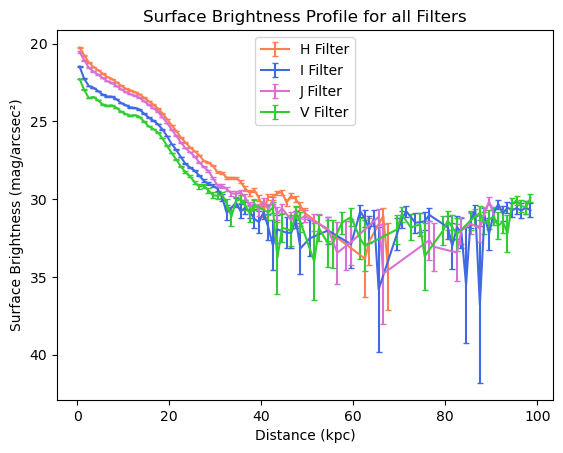

In [15]:
# Creating the plots for the four filters
plt.errorbar(dfH['vector_dist_kpc'], dfH['sb'], yerr=dfH['sb_error'], 
             color='coral',   linestyle='-', capsize=2.5, label='H Filter')
plt.errorbar(dfI['vector_dist_kpc'], dfI['sb'], yerr=dfI['sb_error'], 
             color='royalblue',  linestyle='-', capsize=2.5, label='I Filter')
plt.errorbar(dfJ['vector_dist_kpc'], dfJ['sb'], yerr=dfJ['sb_error'], 
             color='orchid',linestyle='-', capsize=2.5, label='J Filter')
plt.errorbar(dfV['vector_dist_kpc'], dfV['sb'], yerr=dfV['sb_error'], 
             color='limegreen', linestyle='-', capsize=2.5, label='V Filter')

# Personalization of the plots
plt.gca().invert_yaxis()  
plt.xlabel('Distance (kpc)')
plt.ylabel('Surface Brightness (mag/arcsec²)')
plt.title('Surface Brightness Profile for all Filters')
plt.legend(loc='upper center')
plt.show()